ФИО: `Зеленский Павел Игоревич`

Группа: `MADE DS-31`

# **Часть первая, с блекджеком и стратегиями**

1.	Рассмотрим очень простую стратегию: говорить stand, если у нас на руках комбинация в 19, 20 или 21 очко, во всех остальных случаях говорить hit. Используйте методы Монте-Карло, чтобы оценить выигрыш от этой стратегии.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import itertools

In [2]:
import gym
from gym import spaces
from gym.utils import seeding

In [3]:
env = gym.make('Blackjack-v0', natural=True)

In [4]:
def simple_strategy(env, n_monte_carlo):
  rewards = []
  mean_rewards = []
  for i in range(n_monte_carlo):
    obs = env.reset()
    done = False
    reward = 0
    while done == False:
      if obs[0] > 18:
        obs, reward, done, _ = env.step(0)
      else:
        obs, reward, done, _ = env.step(1)
    
    rewards.append(reward)
    mean_rewards.append(np.mean(rewards))
  
  return rewards, mean_rewards

In [54]:
r1, r2 = simple_strategy(env, 100000)

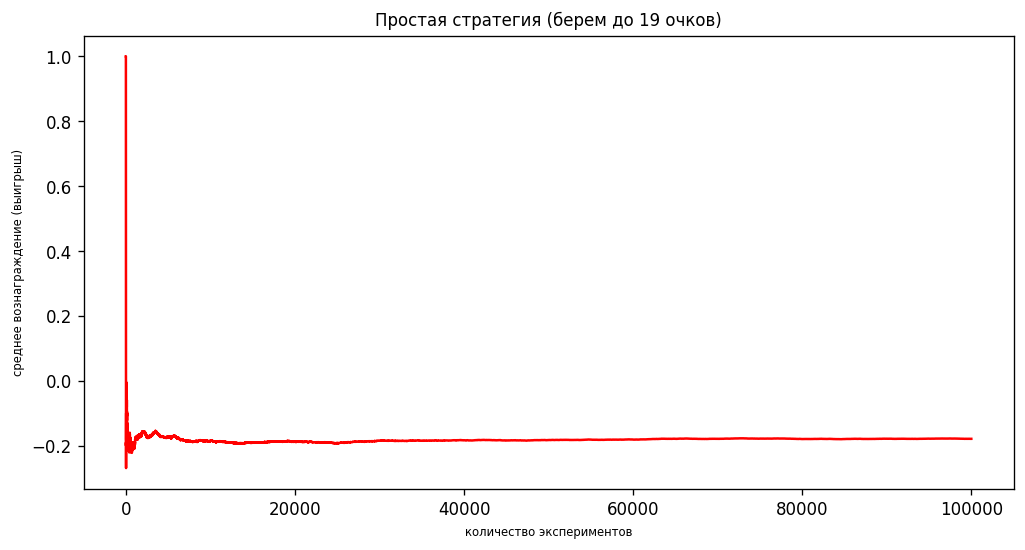

Средний выигрыш простой стратегии составляет: -0.17909


In [55]:
plt.figure(figsize = (10, 5), dpi=120)
plt.plot(r2, 'r')
plt.xlabel('количество экспериментов', fontsize=7)
plt.ylabel('среднее вознаграждение (выигрыш)', fontsize=7)
plt.title('Простая стратегия (берем до 19 очков)', fontsize=10)
plt.show()
print('Средний выигрыш простой стратегии составляет:', r2[-1])

2.	Реализуйте метод обучения с подкреплением без модели (можно Q-обучение, но рекомендую попробовать и другие, например Monte Carlo control) для обучения стратегии в блекджеке, используя окружение Blackjack-v0 из OpenAI Gym.

In [5]:
def is_new_action(Q, observation, action):
  if (observation, action) not in Q.keys():
    Q[(observation, action)] = 0.0

In [7]:
def choose_random_notrandom(epsilon):
  if np.random.random() < epsilon:
    return True
  else:
    return False

In [8]:
def stat_best_action(Q, observation):
  is_new_action(Q, observation, 0)
  is_new_action(Q, observation, 1)
  if Q[(observation, 0)] < Q[(observation, 1)]:
    return 1
  else:
    return 0

In [8]:
def qlearning_strategy(env, n, alpha = 0.5, gamma = 0.5, epsilon = 0.1):
  rewards = []
  mean_rewards = []
  Q = {}
  for i in range(n):
    index = []
    obs = env.reset()
    done = False
    reward = 0
    while done == False:
      if obs[0] == 21:
        action = 0
      elif obs[0] < 12:
        action = 1
      elif choose_random_notrandom(epsilon):
        action = np.random.randint(0,2)
      else:
        action = stat_best_action(Q, obs)

      index.append((obs, action))
      obs, reward, done, _ = env.step(action)
      next_step_max = reward

    rewards.append(reward)
    mean_rewards.append(np.mean(rewards))
    for j in range(len(index)-1, -1, -1):
      index_j = index[j]
      is_new_action(Q, index_j[0], index_j[1])
      Q[index_j] = Q[index_j] + alpha * (reward + gamma * next_step_max - Q[index_j])
      next_step_max = Q[index_j]
  return rewards, mean_rewards, Q

3.	Сколько выигрывает казино у вашей стратегии? Нарисуйте графики среднего дохода вашего метода (усреднённого по крайней мере по 100000 раздач, а лучше больше) по ходу обучения. Попробуйте подобрать оптимальные гиперпараметры.

Средний выигрыш Q-стратегии составляет: -0.074025 0.01 0.0 0.01
Средний выигрыш Q-стратегии составляет: -0.0751 0.01 0.0 0.05
Средний выигрыш Q-стратегии составляет: -0.09235 0.01 0.0 0.1
Средний выигрыш Q-стратегии составляет: -0.08 0.01 0.01 0.01
Средний выигрыш Q-стратегии составляет: -0.0902 0.01 0.01 0.05
Средний выигрыш Q-стратегии составляет: -0.1083 0.01 0.01 0.1
Средний выигрыш Q-стратегии составляет: -0.069575 0.01 0.3 0.01
Средний выигрыш Q-стратегии составляет: -0.0717 0.01 0.3 0.05
Средний выигрыш Q-стратегии составляет: -0.0795 0.01 0.3 0.1
Средний выигрыш Q-стратегии составляет: -0.06775 0.01 0.5 0.01
Средний выигрыш Q-стратегии составляет: -0.076975 0.01 0.5 0.05
Средний выигрыш Q-стратегии составляет: -0.09075 0.01 0.5 0.1
Средний выигрыш Q-стратегии составляет: -0.07075 0.3 0.0 0.01
Средний выигрыш Q-стратегии составляет: -0.083575 0.3 0.0 0.05
Средний выигрыш Q-стратегии составляет: -0.086325 0.3 0.0 0.1
Средний выигрыш Q-стратегии составляет: -0.062925 0.3 0.01 0.01

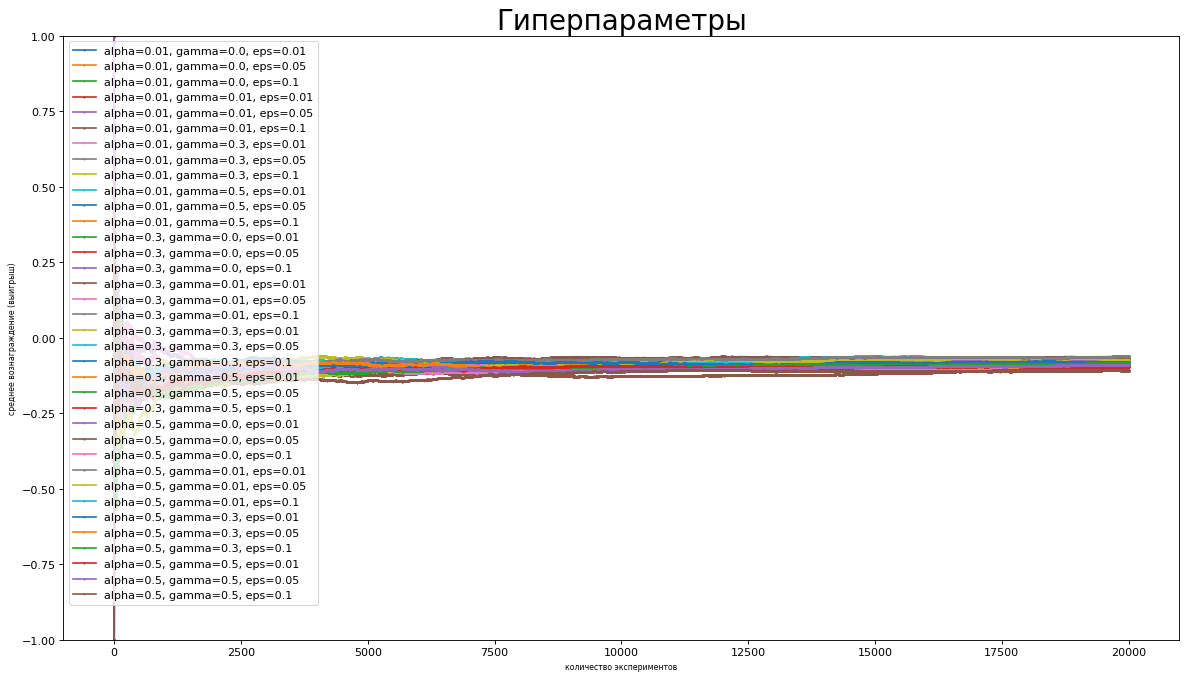

In [60]:
fig = plt.figure(figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
eps_i = [0.01, 0.05, 0.1]
alpha_i = [0.01, 0.3, 0.5]
gamma_i = [0.0, 0.01, 0.3, 0.5]
marker = itertools.cycle(('+', 'd', 'x', 'o', '^', 's', '*', 'p', '<', '>', '^'))
for alpha in alpha_i:
  for gamma in gamma_i:
    for epsilon in eps_i:
      qr1, qr2, qQ = qlearning_strategy(env, n=20000, alpha = alpha, gamma = gamma, epsilon = epsilon)
      plt.plot(qr2, marker=next(marker), markersize=1, label="alpha="+str(alpha)+", gamma="+str(gamma)+", eps="+str(epsilon))
      print('Средний выигрыш Q-стратегии составляет:', qr2[-1], alpha, gamma, epsilon)
plt.ylim(-1, 1)
plt.legend(loc='best')
plt.title('Гиперпараметры', fontsize=25)
plt.xlabel('количество экспериментов', fontsize=7)
plt.ylabel('среднее вознаграждение (выигрыш)', fontsize=7)
plt.show()

In [61]:
qr1, qr2, qQ = qlearning_strategy(env, n=100000, alpha = 0.5, gamma = 0.01, epsilon = 0.01)

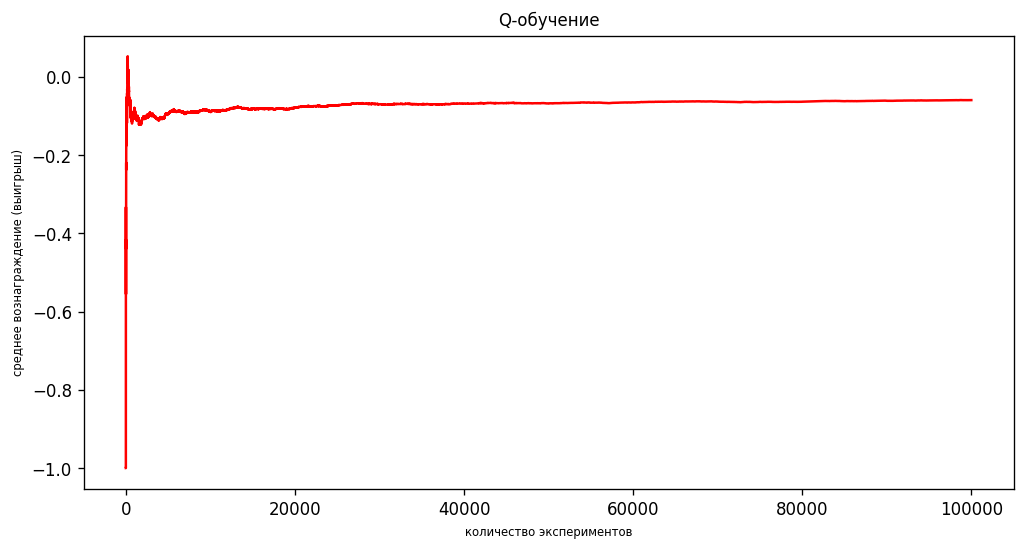

Средний выигрыш Q-стратегии составляет: -0.05978


In [62]:
plt.figure(figsize = (10, 5), dpi=120)
plt.plot(qr2, 'r')
plt.xlabel('количество экспериментов', fontsize=7)
plt.ylabel('среднее вознаграждение (выигрыш)', fontsize=7)
plt.title('Q-обучение', fontsize=10)
plt.show()
print('Средний выигрыш Q-стратегии составляет:', qr2[-1])

# **Часть вторая, удвоенная**

4.	Реализуйте новый вариант блекджека на основе окружения Blackjack-v0 из OpenAI Gym, в котором разрешено удвоение ставки.

In [9]:
def cmp(a, b):
  return float(a > b) - float(a < b)

In [10]:
# 1 = Ace, 2-10 = Number cards, Jack/Queen/King = 10
deck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]

In [11]:
def draw_card(np_random):
  return int(np_random.choice(deck))

In [12]:
def draw_hand(np_random):
  return [draw_card(np_random), draw_card(np_random)]

In [13]:
def usable_ace(hand):  # Does this hand have a usable ace?
  return 1 in hand and sum(hand) + 10 <= 21

In [14]:
def sum_hand(hand):  # Return current hand total
  if usable_ace(hand):
    return sum(hand) + 10
  return sum(hand)

In [15]:
def is_bust(hand):  # Is this hand a bust?
  return sum_hand(hand) > 21

In [16]:
def score(hand):  # What is the score of this hand (0 if bust)
  return 0 if is_bust(hand) else sum_hand(hand)

In [17]:
def is_natural(hand):  # Is this hand a natural blackjack?
  return sorted(hand) == [1, 10]

In [72]:
class BlackjackEnv_double(gym.Env):
    """Simple blackjack environment
    Blackjack is a card game where the goal is to obtain cards that sum to as
    near as possible to 21 without going over.  They're playing against a fixed
    dealer.
    Face cards (Jack, Queen, King) have point value 10.
    Aces can either count as 11 or 1, and it's called 'usable' at 11.
    This game is placed with an infinite deck (or with replacement).
    The game starts with dealer having one face up and one face down card, while
    player having two face up cards. (Virtually for all Blackjack games today).
    The player can request additional cards (hit=1) until they decide to stop
    (stick=0) or exceed 21 (bust).
    After the player sticks, the dealer reveals their facedown card, and draws
    until their sum is 17 or greater.  If the dealer goes bust the player wins.
    If neither player nor dealer busts, the outcome (win, lose, draw) is
    decided by whose sum is closer to 21.  The reward for winning is +1,
    drawing is 0, and losing is -1.
    The observation of a 3-tuple of: the players current sum,
    the dealer's one showing card (1-10 where 1 is ace),
    and whether or not the player holds a usable ace (0 or 1).
    This environment corresponds to the version of the blackjack problem
    described in Example 5.1 in Reinforcement Learning: An Introduction
    by Sutton and Barto.
    http://incompleteideas.net/book/the-book-2nd.html
    """
    def __init__(self, natural=False):
        self.action_space = spaces.Discrete(3)
        self.observation_space = spaces.Tuple((
            spaces.Discrete(32),
            spaces.Discrete(11),
            spaces.Discrete(2)))
        self.seed()

        # Flag to payout 1.5 on a "natural" blackjack win, like casino rules
        # Ref: http://www.bicyclecards.com/how-to-play/blackjack/
        self.natural = natural
        # Start the first game
        self.reset()

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def step(self, action):
        assert self.action_space.contains(action)
        if action == 1:  # hit: add a card to players hand and return
            self.player.append(draw_card(self.np_random))
            if is_bust(self.player):
                done = True
                reward = -1.
            else:
                done = False
                reward = 0.
        elif action == 2:
            self.player.append(draw_card(self.np_random))
            done = True
            while sum_hand(self.dealer) < 17:
                self.dealer.append(draw_card(self.np_random))
            reward = 2 * cmp(score(self.player), score(self.dealer))            
        else:  # stick: play out the dealers hand, and score
            done = True
            while sum_hand(self.dealer) < 17:
                self.dealer.append(draw_card(self.np_random))
            reward = cmp(score(self.player), score(self.dealer))
            if self.natural and is_natural(self.player) and reward == 1.:
                reward = 1.5
        return self._get_obs(), reward, done, {}

    def _get_obs(self):
        return (sum_hand(self.player), self.dealer[0], usable_ace(self.player))

    def reset(self):
        self.dealer = draw_hand(self.np_random)
        self.player = draw_hand(self.np_random)
        return self._get_obs()

5.	Реализуйте метод обучения с подкреплением без модели для этого варианта, постройте графики

In [73]:
env_double = BlackjackEnv_double(True)

In [18]:
def stat_best_action_double(Q, observation):
  is_new_action(Q, observation, 0)
  is_new_action(Q, observation, 1)
  is_new_action(Q, observation, 2)
  if Q[(observation, 0)] < Q[(observation, 1)] and Q[(observation, 2)] < Q[(observation, 1)]:
    return 1
  elif Q[(observation, 0)] < Q[(observation, 2)]:
    return 2
  else:
    return 0

In [75]:
def qlearning_strategy_double(env, n, alpha = 0.5, gamma = 0.5, epsilon = 0.1):
  rewards = []
  mean_rewards = []
  Q = {}
  for i in range(n):
    index = []
    obs = env.reset()
    done = False
    reward = 0
    while done == False:
      if obs[0] == 21:
        action = 0
      elif choose_random_notrandom(epsilon):
        if obs[0] < 12:
          action = np.random.randint(0,2) + 1
        else:
          action = np.random.randint(0,3)
      else:
        action = stat_best_action_double(Q, obs)

      index.append((obs, action))
      obs, reward, done, _ = env.step(action)
      next_step_max = reward

    rewards.append(reward)
    mean_rewards.append(np.mean(rewards))
    for j in range(len(index)-1, -1, -1):
      index_j = index[j]
      is_new_action(Q, index_j[0], index_j[1])
      Q[index_j] = Q[index_j] + alpha * (reward + gamma * next_step_max - Q[index_j])
      next_step_max = Q[index_j]
  return rewards, mean_rewards, Q

Средний выигрыш Q-стратегии составляет: -0.12141666666666667 0.01 0.0 0.01
Средний выигрыш Q-стратегии составляет: -0.11921666666666667 0.01 0.0 0.05
Средний выигрыш Q-стратегии составляет: -0.14008333333333334 0.01 0.0 0.1
Средний выигрыш Q-стратегии составляет: -0.11173333333333334 0.01 0.01 0.01
Средний выигрыш Q-стратегии составляет: -0.12315 0.01 0.01 0.05
Средний выигрыш Q-стратегии составляет: -0.1365 0.01 0.01 0.1
Средний выигрыш Q-стратегии составляет: -0.11273333333333334 0.01 0.3 0.01
Средний выигрыш Q-стратегии составляет: -0.12496666666666667 0.01 0.3 0.05
Средний выигрыш Q-стратегии составляет: -0.14785 0.01 0.3 0.1
Средний выигрыш Q-стратегии составляет: -0.11293333333333333 0.01 0.5 0.01
Средний выигрыш Q-стратегии составляет: -0.10796666666666667 0.01 0.5 0.05
Средний выигрыш Q-стратегии составляет: -0.13058333333333333 0.01 0.5 0.1
Средний выигрыш Q-стратегии составляет: -0.08816666666666667 0.3 0.0 0.01
Средний выигрыш Q-стратегии составляет: -0.115 0.3 0.0 0.05
Сред

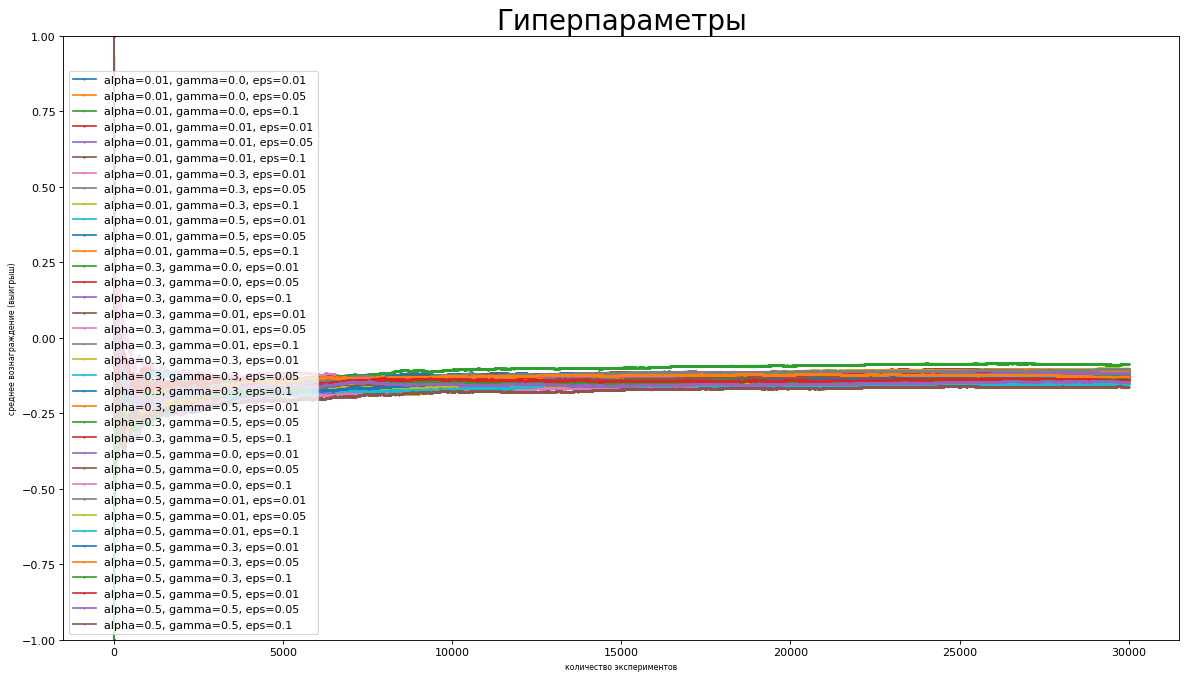

In [77]:
fig = plt.figure(figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
eps_i = [0.01, 0.05, 0.1]
alpha_i = [0.01, 0.3, 0.5]
gamma_i = [0.0, 0.01, 0.3, 0.5]
marker = itertools.cycle(('+', 'd', 'x', 'o', '^', 's', '*', 'p', '<', '>', '^'))
for alpha in alpha_i:
  for gamma in gamma_i:
    for epsilon in eps_i:
      qr1, qr2, qQ = qlearning_strategy_double(env_double, n=30000, alpha = alpha, gamma = gamma, epsilon = epsilon)
      plt.plot(qr2, marker=next(marker), markersize=1, label="alpha="+str(alpha)+", gamma="+str(gamma)+", eps="+str(epsilon))
      print('Средний выигрыш Q-стратегии составляет:', qr2[-1], alpha, gamma, epsilon)
plt.ylim(-1, 1)
plt.legend(loc='best')
plt.title('Гиперпараметры', fontsize=25)
plt.xlabel('количество экспериментов', fontsize=7)
plt.ylabel('среднее вознаграждение (выигрыш)', fontsize=7)
plt.show()

In [78]:
qr1, qr2, qQ = qlearning_strategy_double(env_double, n=200000, alpha = 0.3, gamma = 0.0, epsilon = 0.01)

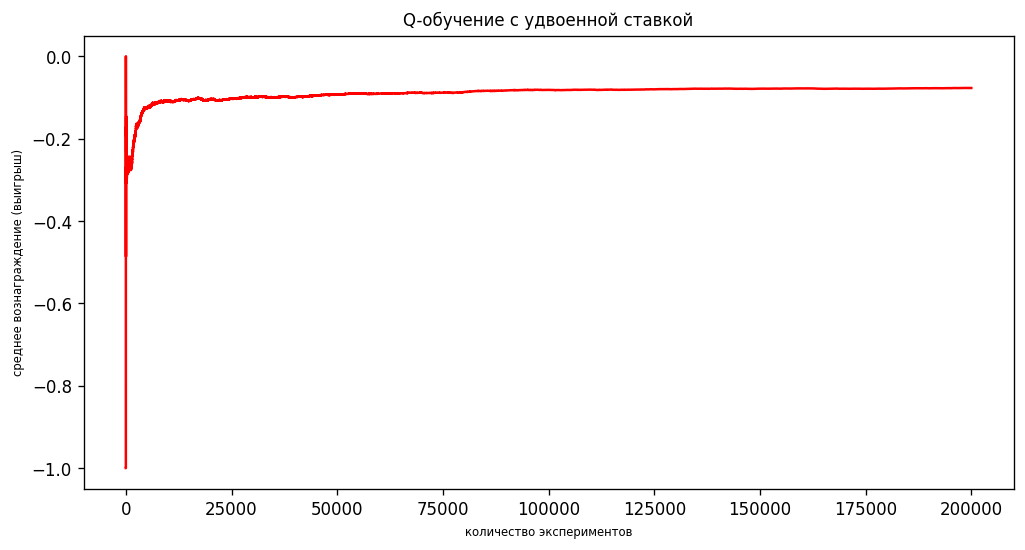

Средний выигрыш Q-стратегии для удвоенных ставок составляет: -0.0770625


In [81]:
plt.figure(figsize = (10, 5), dpi=120)
plt.plot(qr2, 'r')
plt.xlabel('количество экспериментов', fontsize=7)
plt.ylabel('среднее вознаграждение (выигрыш)', fontsize=7)
plt.title('Q-обучение с удвоенной ставкой', fontsize=10)
plt.show()
print('Средний выигрыш Q-стратегии для удвоенных ставок составляет:', qr2[-1])

## **Часть третья, в главной роли — Дастин Хоффман**

6.	Реализуйте вариант окружения Blackjack-v0 из предыдущей части (с удвоением), в котором игрок имеет возможность “считать карты” в колоде. Это можно сделать разными способами; возможно, вам поможет статья википедии о блекджеке (а возможно, и нет).

In [19]:
# 1 = Ace, 2-10 = Number cards, Jack/Queen/King = 10
deck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]
deck = 4*deck

In [20]:
system_counts = {1:-2, 2:1, 3:2, 4:2, 5:3, 6:2, 7:1, 8:0, 9:-1, 10:-2}

In [21]:
def draw_card(np_random, deck, sum_deck_know):
  card = int(np_random.choice(deck))
  sum_deck_know += system_counts[card]
  deck.remove(card)
  return card, sum_deck_know, deck

In [22]:
def draw_hand_player(np_random, deck, sum_deck_know):
  (card1, sum_deck_know, deck) = draw_card(np_random, deck, sum_deck_know)
  (card2, sum_deck_know, deck) = draw_card(np_random, deck, sum_deck_know)
  return [card1, card2], sum_deck_know, deck

In [23]:
def draw_hand_dealer(np_random, deck, sum_deck_know):
  (card1, sum_deck_know, deck) = draw_card(np_random, deck, sum_deck_know)
  (card2, sum_deck_know, deck) = draw_card(np_random, deck, sum_deck_know)
  sum_deck_know -= system_counts[card2]
  return [card1, card2], sum_deck_know, deck

In [24]:
class BlackjackEnv_double_count(gym.Env):
    
    def __init__(self, natural=False):
        self.action_space = spaces.Discrete(3)
        self.observation_space = spaces.Tuple((
            spaces.Discrete(32),
            spaces.Discrete(11),
            spaces.Discrete(2),
            spaces.Discrete(60)))
        self.seed()
        self.init_deck = 4 * [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]
        self.deck_play = self.init_deck.copy()
        self.natural = natural
        self.sum_count = 0
        # Start the first game
        self.reset()

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def step(self, action):
        assert self.action_space.contains(action)
        if action == 1:  # hit: add a card to players hand and return
            card, self.sum_count, self.deck_play = draw_card(self.np_random,  self.deck_play, self.sum_count)
            self.player.append(card)
            if is_bust(self.player):
                done = True
                reward = -1.
            else:
                done = False
                reward = 0.
        elif action == 2:
            card, self.sum_count, self.deck_play = draw_card(self.np_random,  self.deck_play, self.sum_count)
            self.player.append(card)
            done = True
            self.sum_count += system_counts[self.dealer[1]]
            while sum_hand(self.dealer) < 17:
                card, self.sum_count, self.deck_play = draw_card(self.np_random,  self.deck_play, self.sum_count)
                self.dealer.append(card)
            reward = 2 * cmp(score(self.player), score(self.dealer))            
        else:  # stick: play out the dealers hand, and score
            done = True
            self.sum_count += system_counts[self.dealer[1]]
            while sum_hand(self.dealer) < 17:
                card, self.sum_count, self.deck_play = draw_card(self.np_random,  self.deck_play, self.sum_count)
                self.dealer.append(card)
            reward = cmp(score(self.player), score(self.dealer))
            if self.natural and is_natural(self.player) and reward == 1.:
                reward = 1.5
        return self._get_obs(), reward, done, {}

    def _get_obs(self):
        return (sum_hand(self.player), self.dealer[0], usable_ace(self.player), self.sum_count)

    def reset(self):
        if len(self.deck_play) < 15:
          self.deck_play = self.init_deck.copy()
          self.sum_count = 0
        (self.dealer, self.sum_count, self.deck_play) = draw_hand_dealer(self.np_random, self.deck_play, self.sum_count)
        (self.player, self.sum_count, self.deck_play) = draw_hand_player(self.np_random, self.deck_play, self.sum_count)
        return self._get_obs()

In [25]:
def qlearning_strategy_double_count(env, n, alpha = 0.5, gamma = 0.5, epsilon = 0.1):
  rewards = []
  mean_rewards = []
  Q = {}
  for i in range(n):
    index = []
    obs = env.reset()
    done = False
    reward = 0
    while done == False:
      if obs[0] == 21:
        action = 0
      elif choose_random_notrandom(epsilon):
        if obs[0] < 12:
          action = np.random.randint(0,2) + 1
        else:
          action = np.random.randint(0,3)
      else:
        action = stat_best_action_double(Q, obs)

      index.append((obs, action))
      obs, reward, done, _ = env.step(action)
      next_step_max = reward

    rewards.append(reward)
    mean_rewards.append(np.mean(rewards))
    for j in range(len(index)-1, -1, -1):
      index_j = index[j]
      is_new_action(Q, index_j[0], index_j[1])
      Q[index_j] = Q[index_j] + alpha * (reward + gamma * next_step_max - Q[index_j])
      next_step_max = Q[index_j]
  return rewards, mean_rewards, Q

In [26]:
env_double_count = BlackjackEnv_double_count(True)

Средний выигрыш Q-стратегии составляет: -0.15107 0.01 0.0 0.01
Средний выигрыш Q-стратегии составляет: -0.16045 0.01 0.0 0.05
Средний выигрыш Q-стратегии составляет: -0.165755 0.01 0.0 0.1
Средний выигрыш Q-стратегии составляет: -0.14639 0.01 0.01 0.01
Средний выигрыш Q-стратегии составляет: -0.158445 0.01 0.01 0.05
Средний выигрыш Q-стратегии составляет: -0.16881 0.01 0.01 0.1
Средний выигрыш Q-стратегии составляет: -0.13833 0.01 0.3 0.01
Средний выигрыш Q-стратегии составляет: -0.15878 0.01 0.3 0.05
Средний выигрыш Q-стратегии составляет: -0.16668 0.01 0.3 0.1
Средний выигрыш Q-стратегии составляет: -0.14409 0.01 0.5 0.01
Средний выигрыш Q-стратегии составляет: -0.155265 0.01 0.5 0.05
Средний выигрыш Q-стратегии составляет: -0.164945 0.01 0.5 0.1
Средний выигрыш Q-стратегии составляет: -0.14196 0.3 0.0 0.01
Средний выигрыш Q-стратегии составляет: -0.157 0.3 0.0 0.05
Средний выигрыш Q-стратегии составляет: -0.17089 0.3 0.0 0.1
Средний выигрыш Q-стратегии составляет: -0.138675 0.3 0.01

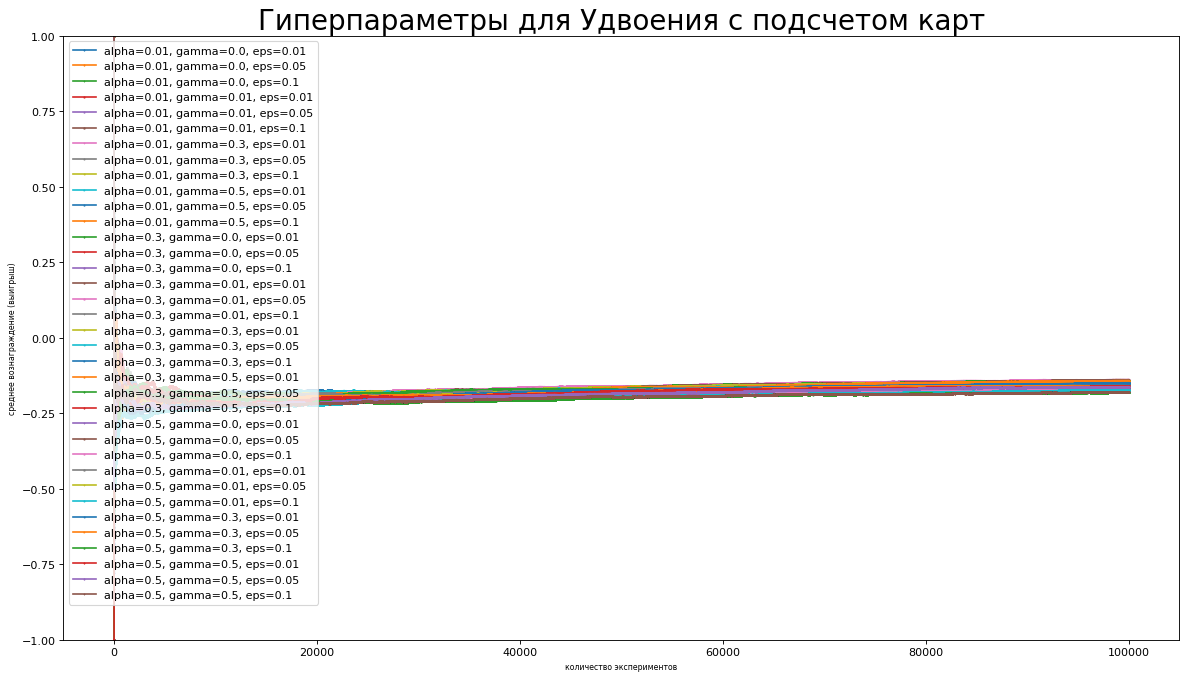

In [28]:
fig = plt.figure(figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
eps_i = [0.01, 0.05, 0.1]
alpha_i = [0.01, 0.3, 0.5]
gamma_i = [0.0, 0.01, 0.3, 0.5]
marker = itertools.cycle(('+', 'd', 'x', 'o', '^', 's', '*', 'p', '<', '>', '^'))
for alpha in alpha_i:
  for gamma in gamma_i:
    for epsilon in eps_i:
      qr1, qr2, qQ = qlearning_strategy_double_count(env_double_count, n=100000, alpha = alpha, gamma = gamma, epsilon = epsilon)
      plt.plot(qr2, marker=next(marker), markersize=1, label="alpha="+str(alpha)+", gamma="+str(gamma)+", eps="+str(epsilon))
      print('Средний выигрыш Q-стратегии составляет:', qr2[-1], alpha, gamma, epsilon)
plt.ylim(-1, 1)
plt.legend(loc='best')
plt.title('Гиперпараметры для Удвоения с подсчетом карт', fontsize=25)
plt.xlabel('количество экспериментов', fontsize=7)
plt.ylabel('среднее вознаграждение (выигрыш)', fontsize=7)
plt.show()

In [31]:
qrс1, qrс2, qсQ = qlearning_strategy_double_count(env_double_count, n=300000, alpha = 0.01, gamma = 0.3, epsilon = 0.01)

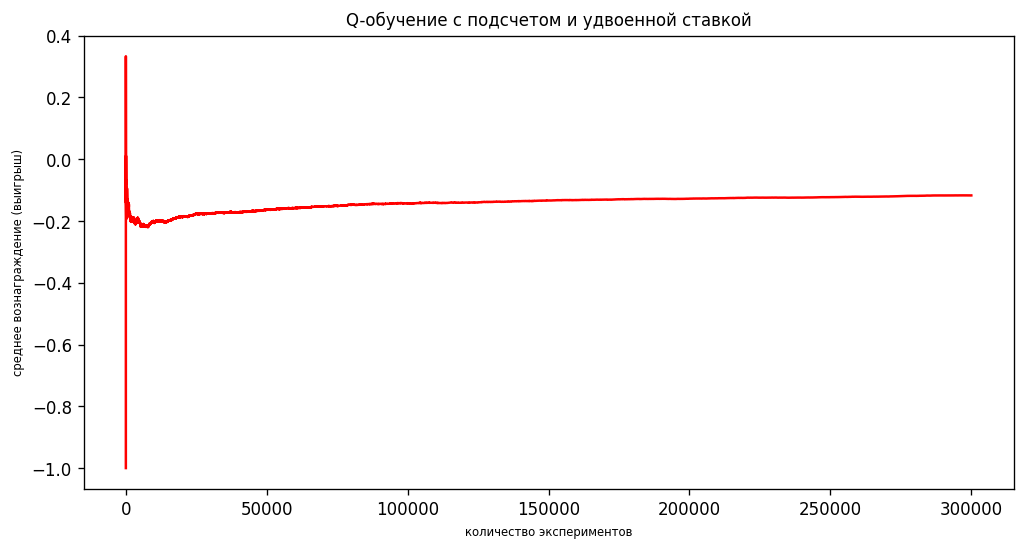

Средний выигрыш Q-стратегии для удвоенных ставок составляет: -0.11722333333333333


In [32]:
plt.figure(figsize = (10, 5), dpi=120)
plt.plot(qrс2, 'r')
plt.xlabel('количество экспериментов', fontsize=7)
plt.ylabel('среднее вознаграждение (выигрыш)', fontsize=7)
plt.title('Q-обучение с подсчетом и удвоенной ставкой', fontsize=10)
plt.show()
print('Средний выигрыш Q-стратегии для удвоенных ставок составляет:', qrс2[-1])

видим что есть динамика на улучшения среднего вознаграждения (по хорошему надо n увеличивать пока не выйдет на константу), но при n больших очень долго работал код и не отработал.